# Tatoeba
> A collection of sentences and translations, crowdsourced, collaborative, open and free 

- toc: false
- badges: false
- comments: false
- author: Morgan McGuire
- categories: [Tatoeba, translation, nmt, mt]

### Available for Download  ✅
⚠️ Always check the license of the data source before using the data ⚠️
- Main page: [https://tatoeba.org/eng](https://tatoeba.org/eng)
- Data Browse Link: [https://tatoeba.org/eng/downloads](https://tatoeba.org/eng/downloads)
- Github: [https://github.com/Tatoeba/tatoeba2](https://github.com/Tatoeba/tatoeba2)
- Format: **.tsv** and **.csv**

### Brief Description

Tatoeba is a large database of sentences and translations. Its content is ever-growing and results from the voluntary contributions of thousands of members.

Tatoeba provides a tool for you to see examples of how words are used in the context of a sentence. You specify words that interest you, and it returns sentences containing these words with their translations in the desired languages. The name Tatoeba (for example in Japanese) captures this concept.

### Other Notes
Getting a parallel Irish-English corpus involves downloading and joining up a number of different files like the Irish sentences file, English sentences file, a Links file that maps one to the other and a Users file that provides the skill level of the person who added the translation.


- Lines of text: 1,973
- GA Word count: 10,352

### Word Count Distribution
Lets take a quick peek at the word count distribution for Irish. Turns out to be mostly super short sentences 

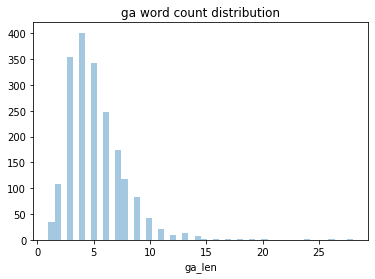

In [174]:
#hide_input
sns.distplot(df.ga_len, kde=False)
plt.title('ga word count distribution');

### Code to Extract to a Pandas DataFrame

In [178]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [168]:
df = pd.read_csv('tatoeba/gle_sentences_detailed.tsv', sep='\t', header=None)
df.columns = ['id', 'lang', 'ga', 'username', 'date_added', 'date_modified']
df['ga_len'] = df.ga.str.split().str.len()
df.head()

,id,lang,ga,username,date_added,date_modified,ga_len
0,557291,gle,Cá bhfuil críochfort na mbus?,niq,2010-10-10 13:17:41,2010-10-10 13:17:41,5
1,557299,gle,"Nuair a dhúisigh mé, bhí brón orm.",niq,2010-10-10 13:20:49,2010-10-10 13:20:49,7
2,557533,gle,Tosaíonn an t-oideachas sa bhaile.,niq,2010-10-10 14:39:19,2010-10-10 14:39:19,5
3,557579,gle,Táim i ngrá leat.,niq,2010-10-10 14:48:53,2010-10-25 12:30:14,4
4,557591,gle,Glanaimid ár rang tar éis scoile.,niq,2010-10-10 14:52:42,2010-10-10 15:10:57,6


Load remaining necessary files. All these files can be downloaded from the Tatoeba downloads page: https://tatoeba.org/eng/downloads

In [175]:
# english sentences
en_df = pd.read_csv('tatoeba/eng_sentences_detailed.tsv', sep='\t', header=None)
en_df.columns = ['en_id', 'lang', 'en', 'username', 'date_added', 'date_modified']

# translation links files
l_df = pd.read_csv('tatoeba/links.csv', sep='\t', header=None)
l_df.columns = ['id1', 'id2']

# tags file - Not super helpful for Irish as not many tags
# t_df = pd.read_csv('tatoeba/tags.csv', sep='\t', header=None)
# t_df.columns = ['id', 'tag']

# User languages and self-reported skill level
u_df = pd.read_csv('tatoeba/user_languages.csv', sep='\t', header=None)
u_df.columns = ['user_lang', 'skill', 'user', 'details']
u_df = u_df.query('user_lang == "gle"')    # filter for ga only
u_df.loc[u_df.skill=='\\N', 'skill'] = -1   #

## Merge
Merge all files to our Irish file

In [171]:
# ga to translation links
df = df.merge(l_df, left_on='id', right_on='id1')
# merge english
df = df.merge(en_df[['en_id','en']], left_on='id2', right_on='en_id')
# merge tags
#df = df.merge(t_df, left_on='id', right_on='id', how='left')
# merge users and skill level
df = df.merge(u_df, left_on='username', right_on='user', how='left')
df.loc[df.skill.isna(), 'skill'] = -1
df = df[['id', 'en_id', 'lang', 'ga', 'en', 'ga_len','skill', 'details']]
df.head()

,id,en_id,lang,ga,en,ga_len,skill,details
0,557291,35406,gle,Cá bhfuil críochfort na mbus?,Where is the bus terminal?,5,-1,NaN
1,557299,1361,gle,"Nuair a dhúisigh mé, bhí brón orm.","When I woke up, I was sad.",7,-1,NaN
2,557533,19122,gle,Tosaíonn an t-oideachas sa bhaile.,Education starts at home.,5,-1,NaN
3,557579,1434,gle,Táim i ngrá leat.,I love you.,4,-1,NaN
4,934942,1434,gle,Tá grá agam duit.,I love you.,4,-1,NaN


Looking at the self-reported skills distribution shows that most people haven't reported their Irish skill level

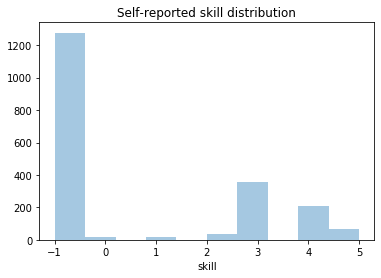

In [172]:
sns.distplot(df.skill, kde=False)
plt.title('Self-reported skill distribution');

Save the file and we're done!

In [176]:
df.to_csv('processed_data/tatoeba_en-ga_20200612.csv')

A few more samples

In [173]:
df.sample(50)

,id,en_id,lang,ga,en,ga_len,skill,details
1016,3602540,703243,gle,Táim ag labhairt le mo mhac léinn.,I'm speaking with my student.,7,-1,NaN
1590,5599832,1357603,gle,Déanta.,Done.,1,-1,NaN
1702,6319314,2014783,gle,Cén fáth a mbeimis ag iarraidh pionós a chur ort?,Why would we want to punish you?,10,4,NaN
1055,3603017,3603008,gle,Tá gabhlóg anseo.,There is a fork here.,3,-1,NaN
141,871635,5152872,gle,Chonaic sé seanchara an tseachtain seo caite n...,Last week he saw an old friend whom he hadn't ...,12,3,NaN
397,2610940,2604279,gle,Céard is ábhar taighde don tSoivéideolaí?,What does a Sovietologist study?,6,-1,NaN
649,3128067,1079842,gle,Tá mé ag léamh an nuachtán.,I'm reading the newspaper.,6,-1,NaN
409,2712366,2705597,gle,Ní chanaim.,I do not sing.,2,-1,NaN
363,2150800,1476581,gle,Tá sé an-dorcha.,It's very dark.,3,-1,NaN
1671,6319282,2014752,gle,Dúirt Tom go raibh comhluadar uaidh.,Tom said he wanted some company.,6,4,NaN
